# Define treatment based on topic clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from params import *
import utils as ut

# Load conflict data
df_lda = pd.read_csv(cleaned_input_path + 'df_lda_topics.csv')
df_lda

,period,isocode,year,month,word_count,topic_0,topic_1,topic_2,topic_3,topic_4,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,200606,AFG,2006,6,66916,95.252215,36.038144,119.044778,77.150955,18.743025,...,83.163826,47.389150,101.536683,49.573454,90.932867,46.137485,51.689544,57.542367,52.084105,53.024244
1,201111,AFG,2011,11,31754,33.331623,24.766626,34.587072,30.522635,5.884416,...,19.356502,15.489929,46.770021,28.715921,39.641628,16.450599,10.821338,40.315762,19.997403,14.817108
2,201607,AFG,2016,7,97344,98.223920,68.336549,97.672617,76.536605,28.248925,...,92.410962,74.351993,191.829274,75.402416,136.504098,42.409346,49.260177,118.812430,83.449392,61.398280
3,202011,AFG,2020,11,32184,29.452580,23.111235,36.084130,25.921798,10.608451,...,29.976497,28.505527,72.733779,16.392217,50.604792,19.664319,21.985382,37.142701,26.651027,23.513517
4,200911,AGO,2009,11,39074,49.674444,21.261275,50.350890,52.930378,8.659063,...,40.348057,47.947247,78.901079,36.071190,73.904577,39.124028,22.935300,24.366933,28.499919,64.060870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,200806,ZMB,2008,6,40755,76.144419,26.626178,78.845510,74.318709,5.959173,...,46.856745,50.962145,62.933655,10.998695,55.236989,32.851384,20.115265,28.432216,23.902817,57.555307
581,202208,ZMB,2022,8,48531,40.710873,41.032612,30.667069,40.007262,7.355697,...,67.967982,48.654880,84.962463,22.349594,63.752514,39.264888,66.254440,32.076216,31.516910,44.790931
582,199209,ZWE,1992,9,65333,59.382324,84.379392,114.074092,59.114256,17.769482,...,126.944060,80.758172,69.478399,11.550437,71.856093,80.755782,25.490217,15.834031,28.215453,72.149419
583,199806,ZWE,1998,6,8523,6.347737,13.565078,12.803857,9.060870,3.170443,...,9.161296,8.923741,17.357426,1.767337,8.528067,7.242599,3.611768,7.244852,4.822574,13.663408


In [2]:
from sklearn.cluster import KMeans
import numpy as np

# 1. Define IMF-relevant topics
#imf_topics = ["topic_0", "topic_1", "topic_2", "topic_6", "topic_21"]
imf_topics = ["topic_5", "topic_9", "topic_17", "topic_19"]

# 2. Extract the sub-matrix for these topics
X_imf = df_lda[imf_topics].values

# 3. Use KMeans with 1 cluster to find "IMF center"
kmeans = KMeans(n_clusters=1, random_state=42).fit(X_imf)
imf_center = kmeans.cluster_centers_[0]

# 4. Compute Euclidean distances to the IMF center
distances = np.linalg.norm(X_imf - imf_center, axis=1)
df_lda['distance_to_imf'] = distances

# 5. Rank by closeness to IMF center (lower = more IMF-like)
df_lda = df_lda.sort_values('distance_to_imf')

# 6. Assign treatment indicators based on top N documents
df_lda['treat_top_10'] = 0
df_lda['treat_top_50'] = 0
df_lda['treat_top_100'] = 0

df_lda.iloc[:10, df_lda.columns.get_loc('treat_top_10')] = 1
df_lda.iloc[:50, df_lda.columns.get_loc('treat_top_50')] = 1
df_lda.iloc[:100, df_lda.columns.get_loc('treat_top_100')] = 1

df_lda

,period,isocode,year,month,word_count,topic_0,topic_1,topic_2,topic_3,topic_4,...,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,distance_to_imf,treat_top_10,treat_top_50,treat_top_100
138,200809,DJI,2008,9,48899,38.165292,31.407377,62.752888,32.076450,11.927468,...,68.296305,38.912577,40.052819,41.714942,38.838326,24.348399,7.936347,1,1,1
189,199701,GIN,1997,1,53946,22.064313,52.577248,81.635262,50.362593,16.774376,...,59.639722,36.165525,55.020508,37.846951,28.159060,56.163005,11.482712,1,1,1
72,199812,BRA,1998,12,69494,62.815380,66.435823,83.468675,65.077080,18.551653,...,58.766307,68.834429,41.782361,66.904980,60.311074,95.487600,12.061727,1,1,1
83,202304,CAF,2023,4,36365,32.192476,27.262807,42.993289,19.355778,6.641690,...,65.403020,35.759858,54.296322,26.488579,15.882640,17.889416,12.187286,1,1,1
510,199509,TCD,1995,9,51625,13.932647,51.031467,66.484631,29.272244,13.932834,...,73.063369,52.461699,45.994477,15.689882,20.340854,17.249532,12.439672,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,202104,KEN,2021,4,154023,163.732191,109.788485,117.483184,117.435334,27.432870,...,250.049071,105.822313,134.612616,132.559797,120.591840,152.032026,369.695235,0,0,0
134,201305,CYP,2013,5,157852,90.433797,80.347997,134.695719,90.290705,30.844793,...,174.638453,159.704792,91.160599,349.015753,121.323398,89.132403,398.143565,0,0,0
249,201305,JAM,2013,5,165699,160.004025,81.008207,241.358342,159.963267,34.417196,...,249.240026,166.274948,107.594750,194.074434,221.233366,196.130769,463.270437,0,0,0
207,201203,GRC,2012,3,204708,88.608824,95.279292,187.076464,110.103097,34.598123,...,249.366197,317.297116,82.065352,270.652290,167.240491,99.344833,622.061676,0,0,0


In [3]:
df_mask = ut.make_mask(198901, 202502, include_continent=True)
treat_cols = ['treat_top_10', 'treat_top_50', 'treat_top_100']
relevant_cols = id_cols + treat_cols
df_treatment = pd.merge(df_mask, df_lda[relevant_cols], how='left', on=['isocode', 'period'])
df_treatment.fillna(0, inplace=True)

# Save to CSV
df_treatment.to_csv(output_path + 'treatment/df_treatment_lda.csv', index=False)
df_treatment
# Group by continent and sum each treatment column
treatment_summary = df_treatment.groupby('continent')[treat_cols].sum().astype(int)
treatment_summary = treatment_summary.sort_index()
treatment_summary

,treat_top_10,treat_top_50,treat_top_100
continent,,,
Africa,5,24,48
Asia,0,8,18
Europe,2,6,15
North America,2,4,8
Oceania,0,0,2
South America,1,8,9


## Topics 7 and 8

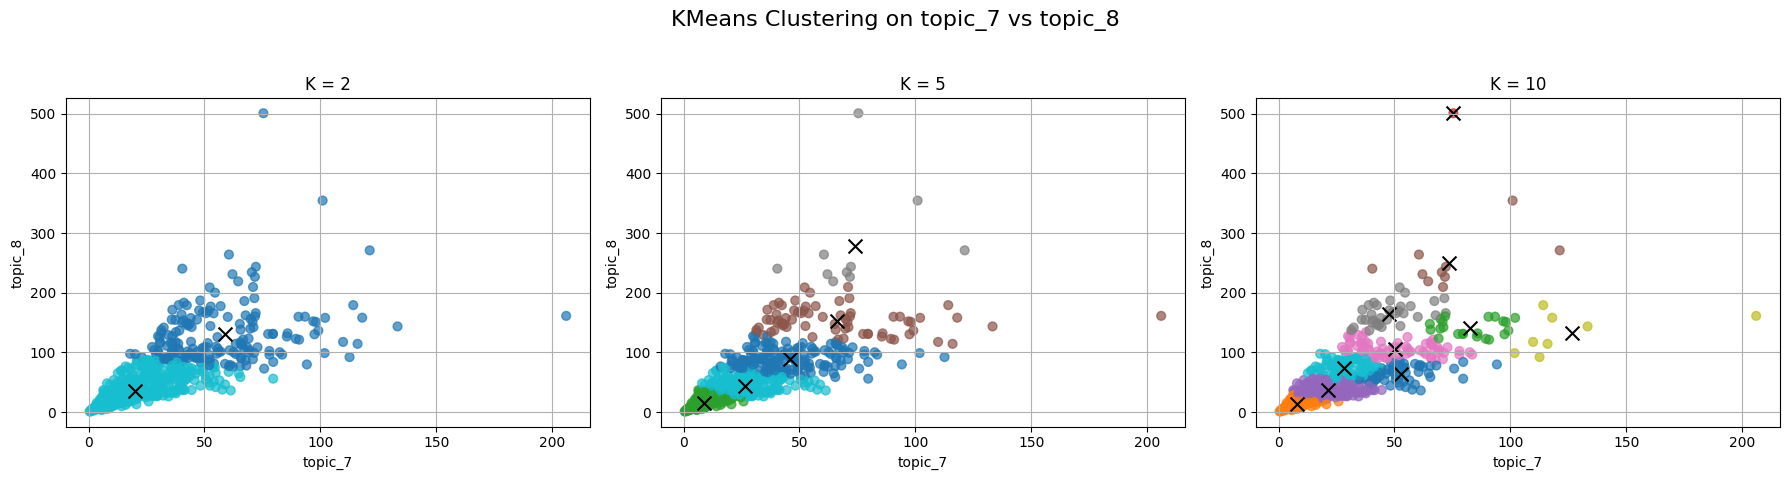

In [7]:
from sklearn.cluster import KMeans

# Step 1: Extract just topic_7 and topic_8
X = df_lda[['topic_7', 'topic_8']].values
k_values = [2, 5, 10]

# Step 2: Create subplots
fig, axes = plt.subplots(1, len(k_values), figsize=(18, 5))

for i, k in enumerate(k_values):
    # Apply KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_
    
    # Save clusters to df_lda
    df_lda[f'cluster_k{k}'] = clusters

    # Plot
    ax = axes[i]
    scatter = ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap='tab10', s=40, alpha=0.7)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, marker='x')  # Plot cluster centers
    ax.set_title(f"K = {k}")
    ax.set_xlabel("topic_7")
    ax.set_ylabel("topic_8")
    ax.grid(True)

plt.suptitle("KMeans Clustering on topic_7 vs topic_8", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [8]:
df_lda['cluster_k10'].value_counts()

cluster_k10
1    154
4    151
9     78
6     71
0     55
7     35
2     22
5     10
8      8
3      1
Name: count, dtype: int64

In [9]:
# Define sets of clusters corresponding to different treatment intensities
treat1_clusters = {3, 8}                        # 19 docs
treat2_clusters = treat1_clusters.union({5})    # 76 docs
treat3_clusters = treat2_clusters.union({2})    # 202 docs

# Create treatment dummy variables
df_lda['treat1'] = df_lda['cluster_k10'].isin(treat1_clusters).astype(int)
df_lda['treat2'] = df_lda['cluster_k10'].isin(treat2_clusters).astype(int)
df_lda['treat3'] = df_lda['cluster_k10'].isin(treat3_clusters).astype(int)

In [10]:
summary_treat1 = df_lda[df_lda['treat1'] == 1][['topic_7', 'topic_8']].mean()
summary_treat2 = df_lda[df_lda['treat2'] == 1][['topic_7', 'topic_8']].mean()
summary_treat3 = df_lda[df_lda['treat3'] == 1][['topic_7', 'topic_8']].mean()

summary_df = pd.DataFrame({
    'treat1_avg': summary_treat1,
    'treat2_avg': summary_treat2,
    'treat3_avg': summary_treat3
})
print(summary_df)

         treat1_avg  treat2_avg  treat3_avg
topic_7  120.817614   95.931844   88.829363
topic_8  173.974295  213.672922  174.669385


In [11]:
df_lda

,period,isocode,year,month,word_count,topic_0,topic_1,topic_2,topic_3,topic_4,...,topic_21,topic_22,topic_23,topic_24,cluster_k2,cluster_k5,cluster_k10,treat1,treat2,treat3
0,200606,AFG,2006,6,66916,95.252215,36.038144,119.044778,77.150955,18.743025,...,51.689544,57.542367,52.084105,53.024244,1,4,0,0,0,0
1,201111,AFG,2011,11,31754,33.331623,24.766626,34.587072,30.522635,5.884416,...,10.821338,40.315762,19.997403,14.817108,1,1,4,0,0,0
2,201607,AFG,2016,7,97344,98.223920,68.336549,97.672617,76.536605,28.248925,...,49.260177,118.812430,83.449392,61.398280,0,2,2,0,0,1
3,202011,AFG,2020,11,32184,29.452580,23.111235,36.084130,25.921798,10.608451,...,21.985382,37.142701,26.651027,23.513517,1,4,9,0,0,0
4,200911,AGO,2009,11,39074,49.674444,21.261275,50.350890,52.930378,8.659063,...,22.935300,24.366933,28.499919,64.060870,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,200806,ZMB,2008,6,40755,76.144419,26.626178,78.845510,74.318709,5.959173,...,20.115265,28.432216,23.902817,57.555307,1,4,4,0,0,0
581,202208,ZMB,2022,8,48531,40.710873,41.032612,30.667069,40.007262,7.355697,...,66.254440,32.076216,31.516910,44.790931,0,0,9,0,0,0
582,199209,ZWE,1992,9,65333,59.382324,84.379392,114.074092,59.114256,17.769482,...,25.490217,15.834031,28.215453,72.149419,1,4,4,0,0,0
583,199806,ZWE,1998,6,8523,6.347737,13.565078,12.803857,9.060870,3.170443,...,3.611768,7.244852,4.822574,13.663408,1,1,1,0,0,0


In [12]:
df_mask = ut.make_mask(198901, 202502, include_continent=True)
relevant_cols = ['isocode', 'period', 'treat1', 'treat2', 'treat3']
df_treatment = pd.merge(df_mask, df_lda[relevant_cols], how='left', on=['isocode', 'period'])
df_treatment.fillna(0, inplace=True)

# Save to CSV
df_treatment.to_csv(output_path + 'treatment/df_treatment_lda.csv', index=False)
df_treatment

,isocode,period,continent,treat1,treat2,treat3
0,AFG,198901,Asia,0.0,0.0,0.0
1,AFG,198902,Asia,0.0,0.0,0.0
2,AFG,198903,Asia,0.0,0.0,0.0
3,AFG,198904,Asia,0.0,0.0,0.0
4,AFG,198905,Asia,0.0,0.0,0.0
...,...,...,...,...,...,...
84191,ZWE,202410,Africa,0.0,0.0,0.0
84192,ZWE,202411,Africa,0.0,0.0,0.0
84193,ZWE,202412,Africa,0.0,0.0,0.0
84194,ZWE,202501,Africa,0.0,0.0,0.0


In [13]:
# Group by continent and sum each treatment column
treatment_summary = df_treatment.groupby('continent')[['treat1', 'treat2', 'treat3']].sum().astype(int)
treatment_summary = treatment_summary.sort_index()
treatment_summary

,treat1,treat2,treat3
continent,,,
Africa,2,6,24
Asia,5,8,11
Europe,2,4,4
North America,0,1,2
Oceania,0,0,0
South America,0,0,0
